# Regression
- A supervised learning problem
- the goal is to predict a continuous number
- Predicting a person’s annual income from their education, their age, and where they live is an example of a regression task. When predicting income, the predicted value is an amount, and can be any number in a given range. Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm. The yield again can be an arbitrary number.
- If there is continuity between possible outcomes, then the problem is a regression problem. Think about predicting annual income. There is a clear continuity in the output. Whether a person makes 40,000 or 40,001 a year does not make a tangible difference, even though these are different amounts of money; if our algorithm predicts 39,999 or 40,001 when it should have predicted 40,000, we don’t mind that much.

# Linear Regression - Simple and Multiple Linear Regression:

Regression is a technique used to model and analyze the relationships between variables and often times how they contribute and are related to producing a particular outcome together. A linear regression refers to a regression model that is completely made up of linear variables. Beginning with the simple case, Single Variable Linear Regression is a technique used to model the relationship between a single input independent variable (feature variable) and an output dependent variable using a linear model i.e a line.

The more general case is Multi-Variable Linear Regression where a model is created for the relationship between multiple independent input variables (feature variables) and an output dependent variable. The model remains linear in that the output is a linear combination of the input variables.

- Fast and easy to model and is particularly useful when the relationship to be modeled is not extremely complex and if you don’t have a lot of data.
- Linear Regression is very sensitive to outliers.

## Simple Linear Regression

- y = b0 + b1*x
- Also called univariate linear regression

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in data
data=pd.read_csv("../data/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# check for null values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
# create feature and labels
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
print(X[:5],y[:5])

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]] [39343. 46205. 37731. 43525. 39891.]


In [5]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42)

In [6]:
# fit model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# predict for test set
y_pred=regressor.predict(X_test)
y_pred

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

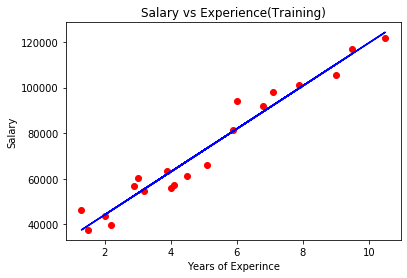

In [8]:
# visualise the training set results
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Salary vs Experience(Training)")
plt.xlabel("Years of Experince")
plt.ylabel("Salary")
plt.show()

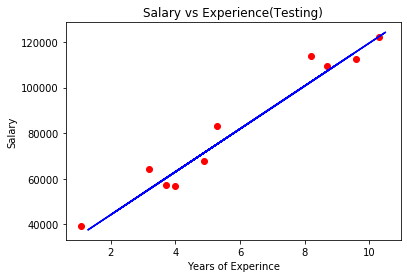

In [9]:
# visualise the test set results
plt.scatter(X_test,y_test,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Salary vs Experience(Testing)")
plt.xlabel("Years of Experince")
plt.ylabel("Salary")
plt.show()

In [10]:
# evaluate
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_test,y_pred)))

5941.540110706558


## Multiple Linear Regression

- y = b0 + b1*x1 + b2*x2 + ..... + bn*xn
- Also called multivariate regression

In [11]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv("../data/50_Startups.csv")

In [13]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

In [15]:
# encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
labelencoder_X=LabelEncoder()
X[:,3]=labelencoder_X.fit_transform(X[:,3])
onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()

X[:5]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

In [16]:
# avoiding the dummy variable trap, scikit-learn however does this internally
X=X[:,1:]

In [17]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
# fit the regressor
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# predict
y_pred=regressor.predict(X_test)

In [20]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))

9055.957323497842


### building the optimal model using backward elimination, taking SL=0.05 (significance level = 50%)

## Backward Elimination:
![](backward-elimination.png)

In [21]:
from statsmodels.api import OLS

X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)
X_opt=X[:,[0,1,2,3,4,5]]
regressor_OLS=OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.34e-27
Time:                        16:54:32   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# remove the one with highest p-value
X_opt=X[:,[0,1,3,4,5]]
regressor_OLS=OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           8.49e-29
Time:                        16:54:32   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X_opt=X[:,[0,3,4,5]]
regressor_OLS=OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           4.53e-30
Time:                        16:54:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_opt=X[:,[0,3,5]]
regressor_OLS=OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           2.16e-31
Time:                        16:54:32   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X_opt=X[:,[0,3]]
regressor_OLS=OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           3.50e-32
Time:                        16:54:32   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### from above we find that, the model consisting of features indexed 0,3,5 has the best Adjusted R-squared value

## Polynomial Regression

- When we want to create a model that is suitable for handling non-linearly separable data, we will need to use a polynomial regression. In this regression technique, the best fit line is not a straight line. It is rather a curve that fits into the data points. For a polynomial regression, the power of some independent variables is more than 1. 

For example, we can have something like: 
##### Y = a_1*X_1 + (a_2)²*X_2 + (a_3)⁴*X_3 ……. a_n*X_n + b 

- Able to model non-linearly separable data; linear regression can’t do this. It is much more flexible in general and can model some fairly complex relationships.
- Full control over the modelling of feature variables (which exponent to set).
- Prone to over fitting if exponents are poorly selected.

In [26]:
data=pd.read_csv("../data/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [27]:
X=data.iloc[:,1:2].values
y=data.iloc[:,2].values

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4) # we'll use a poylnomial regression with degree 4 - b0x1^0 + b1x1^1 + b2x1^2 + b3x1^3 + b4x1^4
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)

lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

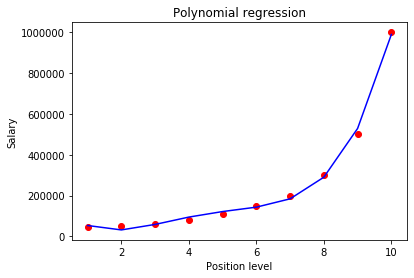

In [29]:
# visualise results
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color="red")
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color="blue")
plt.title("Polynomial regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [30]:
val=np.array([6.5])
val=val.reshape(-1,1)

In [31]:
lin_reg.predict(poly_reg.fit_transform(val))

array([158862.45265155])

# Some key terminologies:

### Kernel: 
The function used to map a lower dimensional data into a higher dimensional data.
### Hyper Plane: 
In SVM this is basically the separation line between the data classes. Although in SVR we are going to define it as the line that will will help us predict the continuous value or target value
### Boundary line: 
In SVM there are two lines other than Hyper Plane which creates a margin . The support vectors can be on the Boundary lines or outside it. This boundary line separates the two classes. In SVR the concept is same. So the lines that we draw are at ‘+e’ and ‘-e ’ distance from Hyper Plane.
### Support vectors: 
These are the data points which are closest to the boundary. The distance of the points is minimum or least.

![](svr.png)

## Support Vector Regression

- In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold.
- Our objective when we are moving on with SVR is to basically consider the points that are within the boundary line. Our best fit line is the line hyperplane that has maximum number of points.

![](svr1.jpeg)

- What we are trying to do here is basically trying to decide a decision boundary at ‘e’ distance from the original hyper plane such that data points closest to the hyper plane or the support vectors are within that boundary line
- Thus the decision boundary is our Margin of tolerance that is We are going to take only those points who are within this boundary.

In [32]:
data=pd.read_csv("../data/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [33]:
X=data.iloc[:,1:2].values
y=data.iloc[:,2].values

In [34]:
# feature scaling as SVR does not do it by itself
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(np.array(y).reshape(-1,1))

In [35]:
# fitting SVR
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
# predicting a new result
sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

array([170370.0204065])

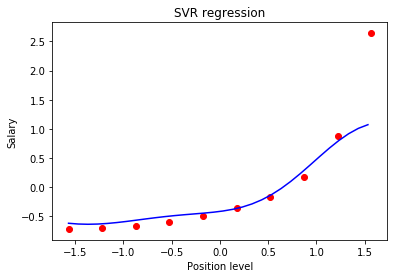

In [37]:
# visualise the results
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X,y,color="red")
plt.plot(X_grid,regressor.predict(X_grid),color="blue")
plt.title("SVR regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

Here, SVR thinks the salary for CEO as outlier because it is far away from the set of values

# Decision tree:

A decision tree is a supervised machine learning model used to predict a target by learning decision rules from features. As the name suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.

## Decision Tree Regression

- Non linear non continuous model
- here, the model takes average of all the data points in that part of the split.

![](dec1.png)
![](dec2.png)

In [38]:
X=data.iloc[:,1:2].values
y=data.iloc[:,2].values

In [39]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=42)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [40]:
y_pred=regressor.predict([[6.5]])
y_pred

array([150000.])

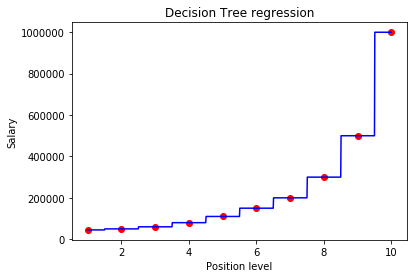

In [41]:
# visualise the results
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X,y,color="red")
plt.plot(X_grid,regressor.predict(X_grid),color="blue")
plt.title("Decision Tree regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Random Forest Regression

### Random forest: Non linear non continuous ensemble model
This is one of the ensemble learning techniques where we use more than one algorithms or one algorithm many times. The basic intution is:
- pick K random data points from the dataset
- build a decision tree associated with these k data points
- Choose the number of trees you want to build and repeat the steps above.
- for a new data point, make each of your decision tree predict the output and assign the new data point a value which is the average of all the predicted values

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=500,random_state=42)
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
# predict
regressor.predict([[6.5]])

array([161340.])

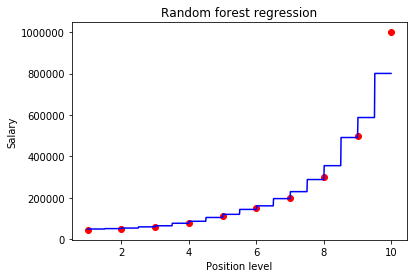

In [44]:
# visualise the results
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X,y,color="red")
plt.plot(X_grid,regressor.predict(X_grid),color="blue")
plt.title("Random forest regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Evaluation Regression models

### 1. R-squared (Goodness of the fit) - 
How good is your model w.r.t the avg values. The closer this value is to 1, the better the model
![](r-squared.png)

Here, 
#### SSres = Sum of squares of residuals 
and 
#### SStot = Sum of squares of total

### 2. Adjusted R-squared: 
The problem with R-squared is that even with multiple variables, it never seems to decrease (the more the number of variables, the greater the value) and hence we have a false/biased estimate of our model's performance. Adjusted R-squared on the other hand uses a penalisation factor to reduce this bias.
![](adj-r-squared.png)

## PROS vs CONS
![](regression-types.png)

## Before:
![](before.png)

## After:
![](after.png)

## L1 and L2 Regularization

![](ridge.png)

![](lasso.png)

## Ridge Regression
Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the training
data, but also to fit an additional constraint. We also want the magnitude of coefficients
to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explicitly
restricting a model to avoid overfitting. The particular kind used by ridge regression
is known as L2 regularization.

The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

In [2]:
import pandas as pd

data=pd.read_csv("../data/Position_Salaries.csv")
data.head()
X=data.iloc[:,1:2].values
y=data.iloc[:,2].values

In [3]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=10)
reg.fit(X,y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

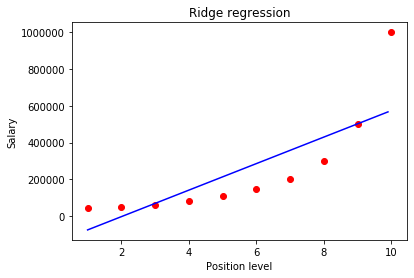

In [7]:
# visualise the results
import numpy as np
import matplotlib.pyplot as plt
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X,y,color="red")
plt.plot(X_grid,reg.predict(X_grid),color="blue")
plt.title("Ridge regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [10]:
print(reg.score(X,y))

0.6612219054127939


## Lasso
An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization.8 The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some features
are entirely ignored by the model. This can be seen as a form of automatic feature
selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero. A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. If we set alpha too low, however, we again remove the effect of regularization and end up overfitting

In [11]:
from sklearn.linear_model import Lasso
reg=Lasso()
reg.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

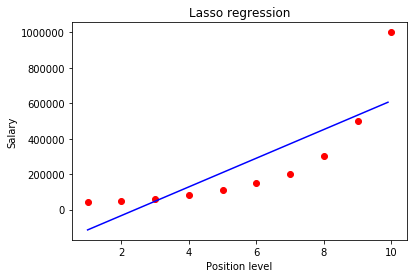

In [12]:
# visualise the results
import numpy as np
import matplotlib.pyplot as plt
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X,y,color="red")
plt.plot(X_grid,reg.predict(X_grid),color="blue")
plt.title("Lasso regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to understand,
as it will select only a subset of the input features.

scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.

In [14]:
from sklearn.linear_model import ElasticNet
reg=ElasticNet()
reg.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

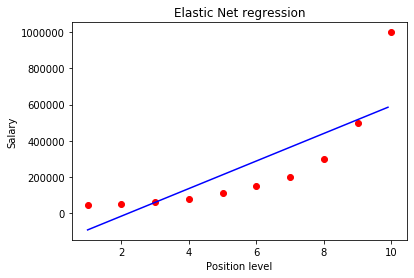

In [15]:
# visualise the results
import numpy as np
import matplotlib.pyplot as plt
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X,y,color="red")
plt.plot(X_grid,reg.predict(X_grid),color="blue")
plt.title("Elastic Net regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()